In [3]:
import pandas as pd

df = pd.read_csv("dataset_sekolah.csv")
df

,jam_belajar_per_hari,persen_kehadiran,bimbel,nilai_tka
0,7,91,ya,91
1,4,80,tidak,65
2,8,100,tidak,92
3,5,85,tidak,68
4,7,85,tidak,89
...,...,...,...,...
195,8,78,tidak,80
196,5,80,ya,72
197,4,91,ya,78
198,2,85,tidak,51


In [4]:
df.shape

(200, 4)

In [5]:
df.columns

Index(['jam_belajar_per_hari', 'persen_kehadiran', 'bimbel', 'nilai_tka'], dtype='object')

In [6]:
df.dtypes

jam_belajar_per_hari     int64
persen_kehadiran         int64
bimbel                  object
nilai_tka                int64
dtype: object

In [7]:
df.head()

,jam_belajar_per_hari,persen_kehadiran,bimbel,nilai_tka
0,7,91,ya,91
1,4,80,tidak,65
2,8,100,tidak,92
3,5,85,tidak,68
4,7,85,tidak,89


In [8]:
df.tail()

,jam_belajar_per_hari,persen_kehadiran,bimbel,nilai_tka
195,8,78,tidak,80
196,5,80,ya,72
197,4,91,ya,78
198,2,85,tidak,51
199,6,76,ya,76


In [14]:
df.sample(5)

,jam_belajar_per_hari,persen_kehadiran,bimbel,nilai_tka
111,3,70,ya,49
1,4,80,tidak,65
155,5,74,ya,75
148,4,98,ya,77
181,5,93,tidak,69


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   jam_belajar_per_hari  200 non-null    int64 
 1   persen_kehadiran      200 non-null    int64 
 2   bimbel                200 non-null    object
 3   nilai_tka             200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [12]:
df.describe()

,jam_belajar_per_hari,persen_kehadiran,nilai_tka
count,200.000000,200.000000,200.000000
mean,5.560000,84.970000,74.765000
std,2.899731,9.546453,16.094875
min,1.000000,70.000000,37.000000
25%,3.000000,76.000000,61.750000
50%,6.000000,86.000000,75.000000
75%,8.000000,93.000000,87.250000
max,10.000000,100.000000,100.000000


In [13]:
df.isna().sum()

jam_belajar_per_hari    0
persen_kehadiran        0
bimbel                  0
nilai_tka               0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(2)

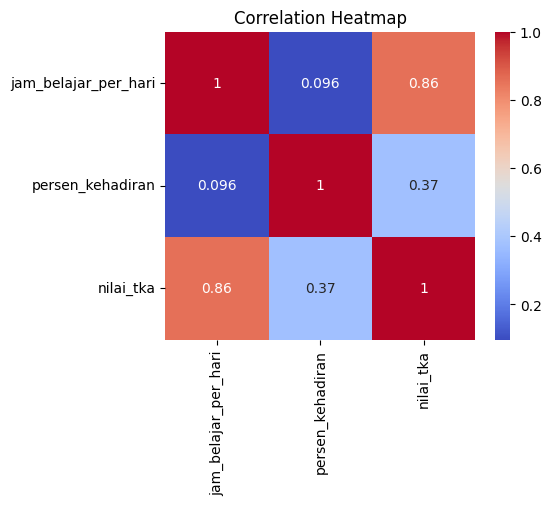

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['jam_belajar_per_hari', 'persen_kehadiran', 'nilai_tka']

plt.figure(figsize=(5,4))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["jam_belajar_per_hari", "persen_kehadiran", "bimbel"]]
y = df["nilai_tka"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["jam_belajar_per_hari", "persen_kehadiran"]
categorical_columns = ["bimbel"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model = Pipeline(
    steps = [
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print("MAE Score : ", mean_absolute_error (y_test, y_pred))
print("MSE Score : ", mean_squared_error(y_test, y_pred))

R2 Score :  0.9074047467782845
MAE Score :  4.060470880939444
MSE Score :  24.17841464922107


In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
print("CV Score :", scores)
print("Mean CV Score :", scores.mean())
print("Std CV :", scores.mean())

CV Score : [0.91307385 0.91887529 0.91645431 0.87271227 0.85091905]
Mean CV Score : 0.8944069529891789
Std CV : 0.8944069529891789


In [47]:
import joblib

joblib.dump(model, "model.joblib")

['model.joblib']

In [54]:
import joblib 
import pandas as pd

model = joblib.load("model.joblib")
data_baru = pd.DataFrame([[4,80, "tidak"]], columns=["jam_belajar_per_hari", "persen_kehadiran", "bimbel"])
prediksi = model.predict(data_baru)[0]
print(f"model memprediksi nilai TKA : {prediksi:.0f}")

model memprediksi nilai TKA : 61
